# Outlier Detection using Percentile Method

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [2]:
df = pd.read_csv('weight-height.csv')
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


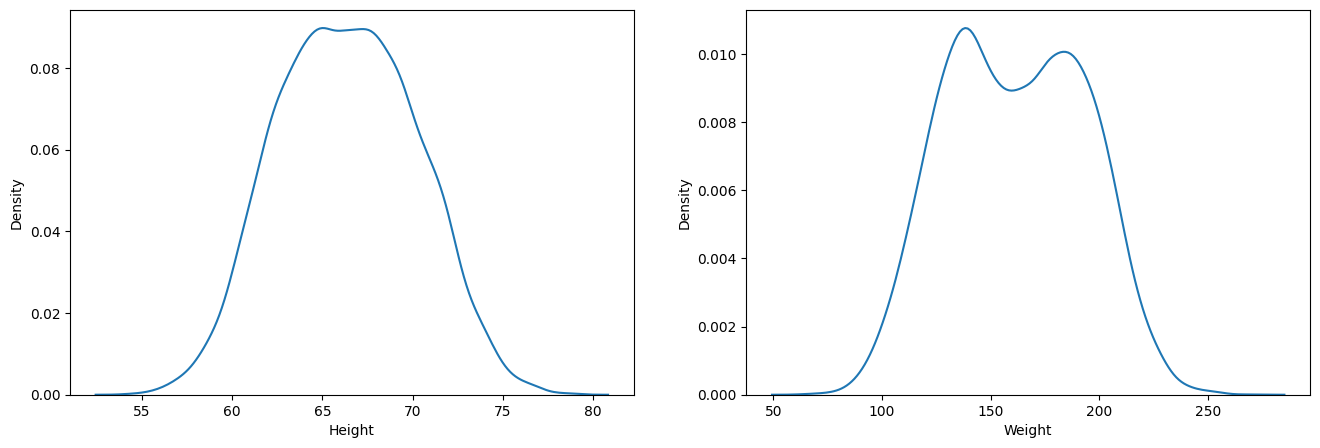

<Figure size 1600x500 with 0 Axes>

<Figure size 1600x500 with 0 Axes>

In [3]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.kdeplot(data=df,x='Height')

plt.subplot(1,2,2)
sns.kdeplot(data=df,x='Weight')

plt.show() 

plt.figure(figsize=(16, 5))

In [20]:
#finding Boundaries
#TRIMMING

upper=round(df['Height'].quantile(0.99),2)
lower=round(df['Height'].quantile(0.01),2)

In [10]:
new_df=df[(df['Height']<upper) & (df['Height']>lower)]

In [12]:
print(new_df['Height'].describe())
print(df['Height'].describe())

count    9800.000000
mean       66.364366
std         3.645075
min        58.134496
25%        63.577162
50%        66.318070
75%        69.119896
max        74.785714
Name: Height, dtype: float64
count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64


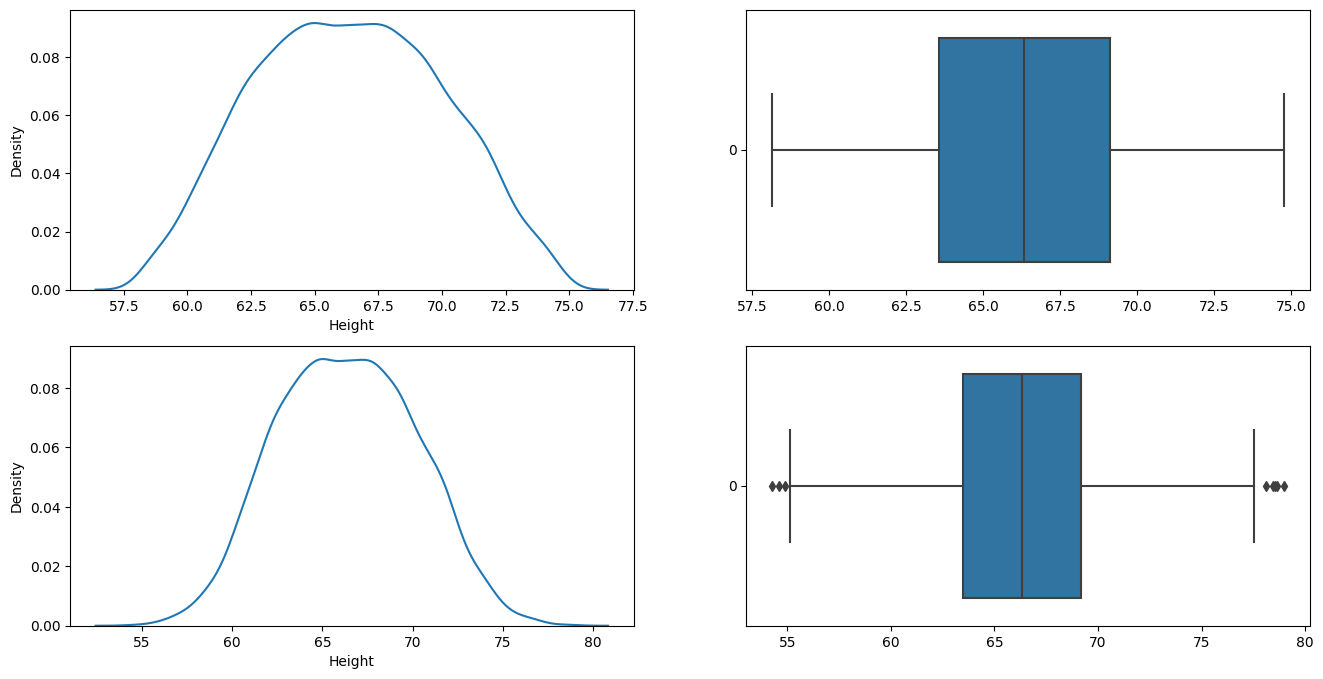

In [17]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.kdeplot(new_df['Height'])

plt.subplot(2,2,2)
sns.boxplot(new_df['Height'],orient='h')

plt.subplot(2,2,3)
sns.kdeplot(df['Height'])

plt.subplot(2,2,4)
sns.boxplot(df['Height'],orient='h')
plt.show()

In [24]:
#Cappting/Winsorization

df['Height_cap']=np.where(df['Height']>=upper,upper,
        np.where(df['Height']<=lower,lower,
                df['Height']))

df

,Gender,Height,Weight,Height_cap
0,Male,73.847017,241.893563,73.847017
1,Male,68.781904,162.310473,68.781904
2,Male,74.110105,212.740856,74.110105
3,Male,71.730978,220.042470,71.730978
4,Male,69.881796,206.349801,69.881796
...,...,...,...,...
9995,Female,66.172652,136.777454,66.172652
9996,Female,67.067155,170.867906,67.067155
9997,Female,63.867992,128.475319,63.867992
9998,Female,69.034243,163.852461,69.034243


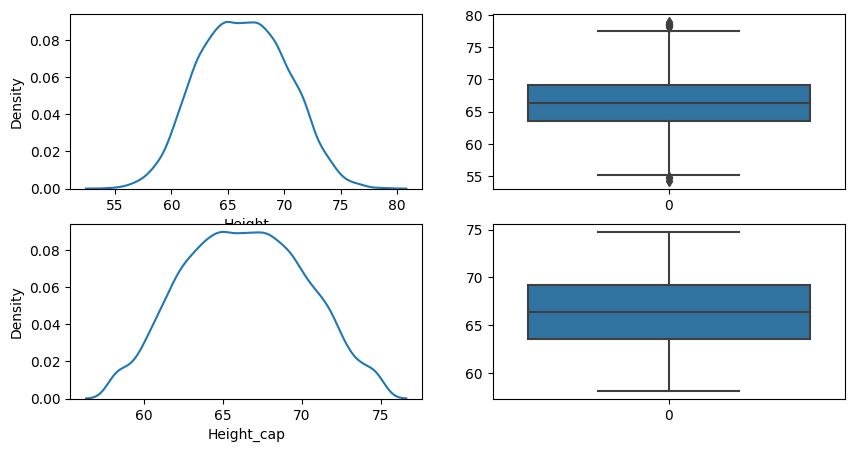

In [29]:
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
sns.kdeplot(df['Height'])

plt.subplot(2,2,2)
sns.boxplot(df['Height'])

plt.subplot(2,2,3)
sns.kdeplot(df['Height_cap'])

plt.subplot(2,2,4)
sns.boxplot(df['Height_cap'])

plt.show()